# Практическая работа №3: Исследование подгрупп сетей. Сети аффилированности.



Выполнил студент гр. 3385 Гребенщиков Артём Андреевич. Вариант №3.

## Цель работы

Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.


## Основные теоретические положения


### Основные определения

#### Социоматрица
Социоматрица $A$ - это квадратная матрица размера $g \times g$, где $g$ - количество акторов в сети. Элемент $a_{ij}$ принимает значение:
- $1$, если существует связь от актора $i$ к актору $j$
- $0$, если связь отсутствует

Для неориентированных сетей матрица симметрична: $a_{ij} = a_{ji}$

#### Список рёбер
Альтернативное представление сети в виде множества упорядоченных пар:
$E = \{(i,j) | a_{ij} = 1\}$

#### Плотность сети
Плотность $den$ неориентированной сети G вычисляется как:

$$den(G) = \frac{2L}{g(g-1)}$$

где $L$ - количество рёбер, $g$ - количество вершин.

#### Компоненты связности
Компонента связности - максимальное подмножество вершин, где существует путь между любой парой вершин.

#### Диаметр сети
Диаметр $diam$ - максимальное геодезическое расстояние между любой парой вершин в сети G:

$$diam(G) = \max_{i,j} d_{ij}$$

где $d_{ij}$ - длина кратчайшего пути между вершинами $i$ и $j$.

#### Коэффициент кластеризации
Локальный коэффициент кластеризации $Cl_i$ для вершины $i$ графа G:

$$Cl_i(G) = \frac{2N_i}{k_i(k_i-1)}$$

где $N_i$ - количество треугольников через вершину $i$, $k_i$ - степень вершины.

Глобальный коэффициент кластеризации:

$$Cl(G) = \frac{1}{n} \sum_{i=1}^n C_i$$

#### Двудольные сети

Сеть $G = (V, E)$, где $V = V_1 \cup V_2$, $V_1 \cap V_2 = \emptyset$, и все рёбра $e \in E$ соединяют вершины из разных множеств:
$$
E \subseteq \{(u,v) | u \in V_1, v \in V_2\}
$$


#### Гиперграф

Обобщение графа, в котором каждым ребером могут соединяться не два узла, а подмножество

$$
H = H(A, B)$$ где

$A$ - набор вершин

$B$ - набор гипер ребер


#### Проекции двудольной сети

- *Проекция на акторы* ($P_1$): $A_1 = B B^T - D_1$
- *Проекция на события* ($P_2$): $A_2 = B^T B - D_2$

где $D_1$, $D_2$ - диагональные матрицы степеней.


#### K-ядра

$k$-ядро - максимальный подграф, в котором каждый узел смежен не менее чем с k узлами в подграфе:

$$\deg(v) \geq k, ∀ v \in V$$


#### Отношение шансов

Для таблицы сопряженности:

| | Участвует в $j$ | Не участвует в $j$ |
|-|-----------------|-------------------|
| Участвует в $i$ | $a$ | $b$ |
| Не участвует в $i$ | $c$ | $d$ |

$$
OR = \frac{a \cdot d}{b \cdot c}, \quad LOR = \ln(OR)
$$





### Меры центральности

#### Центральность по степени
Для вершины $i$ в неориентированной сети:

$$C_D(i) = deg(i)$$

Нормированная центральность по степени:

$$C_D'(i) = \frac{deg(i)}{g - 1}$$

#### Центральность по близости
$$C_C(i) = \frac{1}{\sum_{j \neq i} d_{ij}}$$

где $d_{ij}$ - расстояние между вершинами.

Нормированная центральность по близости:

$$C_C'(i) = \frac{g-1}{\sum_{j \neq i} d_{ij}}$$

#### Центральность по посредничеству
$$C_B(i) = \sum_{j < k} \frac{\sigma_{jk}(i)}{\sigma_{jk}}$$

где $\sigma_{jk}$ - количество кратчайших путей между $j$ и $k$, $\sigma_{jk}(i)$ - количество таких путей через $i$.

Нормированная центральность по посредничеству:

$$C_B'(i) =\frac{2 C_B(i)}{(g-1)(g-2)}$$

#### Центральность по информации

Алгоритм нахождения:
1) Вычислить матрицу псевдосмежности $A = 1 + K$, где $K$ - матрица Кирхгофа $g \times g$
2) Вычислить обратную матрицу $A^{-1} = C$
3) $T = Tr(C)$, $R = ∑c_{ij}$
Тогда центральность по информации:

$$C_I(i) = \frac{1}{c_{ii} + (T-2R)/g}$$

Нормированная центральность по информации:

$$C_I'(i) = \frac{C_I(i)}{∑C_I(j)}$$

### Групповые характеристики сетей

#### Централизация по степени
$$
C_D = \frac{\sum_{i=1}^g [C_D(n^*) - C_D(n_i)]}{(g-1)(g-2)}
$$
где $C_D(n^*)$ - максимальная степень центральности, $g$ - число вершин.

#### Централизация по близости
$$
C_C = \frac{\sum_{i=1}^g [C'_C(n^*) - C'_C(n_i)]}{[(g-2)(g-1)]/(2g-3)}
$$

#### Централизация по посредничеству
$$
C_B = \frac{\sum_{i=1}^g [C'_B(n^*) - C'_B(n_i)]}{g-1}
$$


### Меры престижа для ориентированных сетей

#### Престиж по степени
$$P_D(i) = \frac{deg_i(i)}{g-1}$$

где $deg_i(i)$ - полустепень захода.

#### Престиж по близости
$$
P_P(i) = \frac{|I_i|}{g-1} \cdot \frac{|I_i|}{\sum d_{ij}}
$$
где $|I_i|$ — количество вершин, достижимых из $i$,  

#### Престиж по рангу
Решается система уравнений:
$$
\left(\frac{1}{a}E - X\right)^TP_R = x
$$
где:  
- $X$ — социоматрица
- $a = \frac{1}{\lambda}$, где $\lambda$ — максимальное собственное значение матрицы $X$  
- $x$ — вектор сумм столбцов  
- $E$ — единичная матрица  

Нормированный престиж:
$$
P_R^{'}(n_i) = \frac{P_R(n_i)}{m}$$

где $ m = \sum^{g-1}_{k=1} a^kA^k_{g-1}$


### Алгоритмы визуализации сетей

#### Фрюхтерман-Рейнгольд
Основан на физической аналогии:
- Вершины отталкиваются друг от друга
- Рёбра действуют как пружины
Минимизирует функцию энергии:

$$E = \sum_{i \neq j} k_r(d_{ij}) + \sum_{(i,j) \in E} k_a(d_{ij})$$

где $k_r$ - сила отталкивания, $k_a$ - сила притяжения.

#### Камада-Каваи
Минимизирует разницу между геодезическими и евклидовыми расстояниями:

$$E = \sum_{i \neq j} \frac{1}{2} k_{ij}(||p_i - p_j|| - l_{ij})^2$$

где $l_{ij}$ - желаемое расстояние, $k_{ij}$ - вес пружины.

### Случайная сеть Эрдёша–Реньи (Erdős–Rényi model)

**Модель случайного графа Эрдёша–Реньи** $G(n, p)$, описывает сеть из n вершин, в которой каждая возможная дуга (для орграфа) или ребро (для неорграфа) появляется независимо от других с фиксированной вероятностью $ p \in [0,1]$ . Для ориентированного графа без петель общее число возможных дуг: $ n(n-1)$ .


### Диады и цензус диад

**Диада** — упорядоченная или неупорядоченная пара вершин. В ориентированном графе с матрицей смежности $X$ возможны три типа диад:

- **Симметричная M (mutual)**: дуги $  i \to j $ и $ j \to i $ присутствуют одновременно.

$$ M = 1/2 * tr(X^2)$$

- **Ассиметричная A (asymmetric)**: присутствует ровно одна из двух возможных дуг.

$$ A = tr(XX^T) + 2M$$

- **Нулевая N (null)**: обе дуги отсутствуют.

$$ N = C^2_g - A - M $$

**Цензус диад** — тройка чисел $ (M, A, N) $, сумма которых равна общему числу упорядоченных пар $ n(n-1)$ . Он характеризует глобальный баланс симметрии и плотности сети.

### Индекс взаимности Каца–Пауэлла

Измеряет избыток (или дефицит) взаимных связей по сравнению с ожиданием в случайной модели:
$$
\mu_{\text{кр}} = \frac{2(g - 1)M - gd^2}{gd(g - d -1)},
$$

где $ M $ — наблюдаемое число взаимных дуг, $d < g - 1$ - число выборов, который может сделать каждый актор

- **Фиксированная модель**: предполагается, что каждый узел имеет одинаковую ожидаемую степень $ d $.
- **Свободная модель**: учитывает реальное распределение входящих и исходящих степеней.

Значение $ \mu_{\text{кр}} \approx 0 $ означает случайный уровень взаимности, $ \mu_{\text{кр}} > 0 $ — избыток, $ \mu_{\text{кр}} < 0 $ — дефицит.

### Вероятность взаимной связи

В рамках модели Каца–Пауэлла оценивается вероятность того, что дуга $ i \to j $ сопровождается дугой $ j \to i $. Вычисляется отдельно для:
- **Фиксированного выбора** (все узлы одинаково активны),
- **Свободного выбора** (активность узлов задаётся их реальными степенями).

Различие между этими оценками показывает, насколько структура степеней влияет на взаимность.

### Индекс взаимности Бондопаддхая

Нормированный показатель, основанный на границах возможного числа взаимных дуг при фиксированном векторе степеней:
$$
M_{\text{B}} = \frac{M - M_{\min}}{M_{\max} - M_{\min}},
$$
где:
- $ M $ — наблюдаемое число взаимных дуг,
- $ M_{\min} ,  M_{\max} $ — минимально и максимально возможное число взаимных дуг при данном распределении степеней.

Значение $ M_{\text{B}} \in [0,1] $:
- $ M_{\text{B}} \approx 0 $: взаимность минимальна,
- $ M_{\text{B}} \approx 1 $: взаимность максимально возможна,
- $ M_{\text{B}} \approx 0.5 $: «средний» уровень.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы


### Загрузка необходимых библиотек

In [47]:
if (!require(igraph)) {
  install.packages("igraph")
  library(igraph)
}

if (!require(statnet)) {
  install.packages("statnet")
  library(statnet)
}

if (!require(intergraph)) {
  install.packages("intergraph")
  library(intergraph)
}

### Работа с моделью Эрдеша—Реньи

#### 1. Создание случайный орграфа на основе модели Эрдеша—Реньи



In [48]:
g = 115 # Количество вершни в соответсвии в вариантом
p = 0.76 # Вероятность генерации ребра между вершинами
inet1 <- sample_gnp(
  n = g,
  p = p,
  directed = TRUE
)

#### 2. Отображение графа


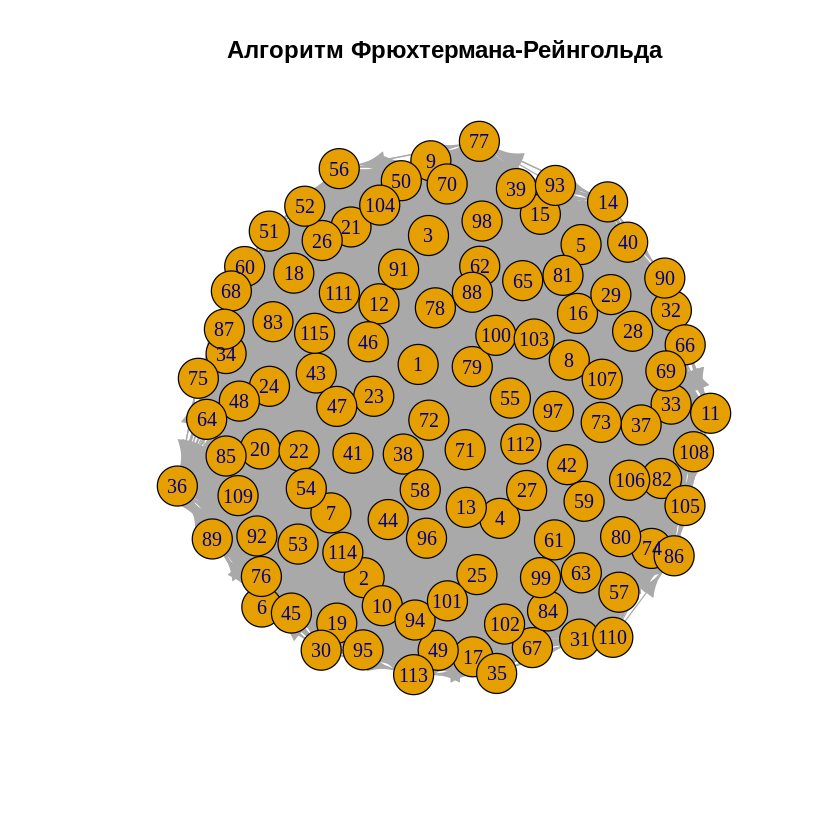

In [49]:
plot(inet1, main = "Алгоритм Фрюхтермана-Рейнгольда", layout = layout_with_fr)

#### 3. Пятичисловая сводка


In [50]:
snet1 <- asNetwork(inet1)

cat("Размер сети:", network.size(snet1), "\n")

cat("Плотность сети:", round(gden(snet1), 3), "\n")

cat("Число компонент:", components(snet1), "\n")

lgc <- component.largest(snet1, result = "graph")
gd <- geodist(lgc)
net_diameter <- max(gd$gdist)
cat("Диаметр сети:", net_diameter, "\n")

clustering_coef <- gtrans(snet1, mode = "graph")
cat("Коэффициент кластеризации:", round(gtrans(snet1, mode = "graph"), 3), "\n")


Размер сети: 115 
Плотность сети: 0.763 
Число компонент: 1 
Диаметр сети: 2 
Коэффициент кластеризации: 0.762 


#### 4. Цензус диад

In [51]:
ds <- dyad_census(inet1)
ds

$mut
[1] 3819

$asym
[1] 2359

$null
[1] 377

 Количество нулевых диад крайне мало в сравнении с взаимными и ассиметричными, что хорошо объяснимо высокой вероятностью формирования ребра

#### 5. Оценка индекса взаимности Каца—Пауэла

In [71]:
d = g * p
mu_fix <- (2 * (g - 1) * ds$mut - g * d * d) / (g * d * (g - d - 1))
cat("Оценку индекса взаимности КП ", mu_fix, "с фиксированном d =", d, "\n")

degrees <- degree(snet1, cmode = "outdegree")
L = sum(degrees)
L2 = sum(degrees^2)
mu_free <- (2 * (g - 1) * (g - 1) * ds$mut - L * L + L2) / (L * (g - 1) * (g - 1) - L * L + L2)
cat("Оценку индекса взаимности КП ", mu_free)

Оценку индекса взаимности КП  -0.02889549 с фиксированном d = 87.4 
Оценку индекса взаимности КП  0.006306469

##### Вывод
Индекс взаимности Катца–Пауэлла измеряет, насколько чаще (или реже) в ориентированной сети встречаются взаимные связи по сравнению с ожиданием при случайных выборах. При выборе d, как произведения количества вершин на шанс появления ребра, равном 87.4, индекс взаимности Катца–Пауэлла ≈ −0.018, что указывает на незначительный дефицит взаимности относительно случайной модели. Однако при учёте реального распределения степеней, индекс взаимности Катца–Пауэлла ≈ +0.015, то есть наблюдается слабый, но положительный избыток взаимности — узлы чуть чаще отвечают друг другу, чем ожидалось бы случайно при их фактической активности. Это различие показывает, что модель со свободными степенями даёт более адекватную оценку для реальных сетей, где активность узлов сильно варьируется.

#### 6. Вероятность взаимной связи

In [70]:
Pij_fix <- (d / (g - 1)) * ((d / (g - 1)) + mu_fix * (g - d - 1) / (g - 1))
cat("Вероятность взаимной связи при fix выборе: ", Pij_fix, "\n")
Pij_free <- (L / (g * (g - 1))) * ((L / (g * (g - 1)))  + mu_free * (1 - (L / (g * (g - 1)))))
cat("Вероятность взаимной связи при free выборе: ", Pij_free)

Вероятность взаимной связи при fix выборе:  0.5826087 
Вероятность взаимной связи при free выборе:  0.5826209

#### 7. Индекс взаимности Бондопаддхая

In [54]:
max_g <- -Inf
M_min <- -Inf

for (t in 1:g) {
    f_t <- sum(degrees[1:t]) - t * (g - 1) - (t * (t - 1)) / 2

    if (t == g) {
        sum_min_rest <- 0
    } else {
        sum_min_rest <- sum(pmin(t, degrees[(t + 1):g]))
    }

    g_t <- sum(degrees[1:t]) - t * (t - 1) - sum_min_rest

    if (g_t > max_g) max_g <- g_t
    if (f_t > M_min) M_min <- f_t
}

M_min <- pmax(0, M_min)
M_max <- (sum(degrees) - max_g) / 2

cat("M_max: ", M_max, "\n")
cat("M_min: ", M_min, "\n")

M_b <- (ds$mut - M_min) / (M_max - M_min)
cat("Индекс взаимности Бондопаддхая: ", M_b, "\n")

M_max:  5015 
M_min:  0 
Индекс взаимности Бондопаддхая:  0.7615155 


По значения индекса 0,765 можно сделать вывод, что уровень взаимности в сети значительно выше среднего: наблюдаемое количество взаимных связей составляет около 76% от максимально возможного при данной структуре степеней, что указывает на выраженную тенденцию акторов отвечать друг другу в взаимодействиях.

#### 8. Проверка нулевой гипотезы о том, что число дуг в орграфе имеет биномиальное распределение $Binom(𝑔(𝑔 − 1), 1/2)$

In [67]:
L <- ecount(inet1)
alpha <- 0.05

p0_1 <- 0.5
prob_obs_1 <- dbinom(L, size = g * (g - 1), prob = p0_1)
probs_1 <- dbinom(0:g * (g - 1), size = g * (g - 1), prob = p0_1)
pval_1 <- sum(probs_1[probs_1 <= prob_obs_1])

cat("p-value =", pval_1, "\n")
cat("H0", ifelse(pval_1 < alpha, "отвергается", "не отвергается"), "на уровне α =", alpha, "\n\n")

p-value = 0 
H0 отвергается на уровне α = 0.05 



#### 9. Проверка нулевой гипотезы о том, что число дуг в орграфе имеет биномиальное распределение $Binom(𝑔(𝑔 − 1), 𝑃_0)$

In [68]:
p0_2 <- 0.66
prob_obs_2 <- dbinom(L, size = g * (g - 1), prob = p0_2)
probs_2 <- dbinom(0:g * (g - 1), size = g * (g - 1), prob = p0_2)
pval_2 <- sum(probs_2[probs_2 <= prob_obs_2])

cat("p-value =", pval_2, "\n")
cat("H0", ifelse(pval_2 < alpha, "отвергается", "не отвергается"), "на уровне α =", alpha, "\n\n")

p-value = 2.708333e-152 
H0 отвергается на уровне α = 0.05 



#### 10. Построение доверительного интервала

In [69]:
p_hat <- L / (g * (g - 1))
se <- sqrt(p_hat * (1 - p_hat) / (g * (g - 1)))
z <- qnorm(1 - alpha/2)

ci_low <- p_hat - z * se
ci_up  <- p_hat + z * se

cat("Оценка p =", round(p_hat, 4), "\n")
cat((1 - alpha) * 100, "% ДИ для p: [", round(ci_low, 4), ",", round(ci_up, 4), "]\n")
cat("Значение p = 0.76", ifelse(0.76 >= ci_low & 0.76 <= ci_up, "", "НЕ"), "попадает в ДИ\n")

Оценка p = 0.7625 
95 % ДИ для p: [ 0.7553 , 0.7698 ]
Значение p = 0.76  попадает в ДИ


##### Вывод

Полученная оценка параметра p = 0.7625 указывает на высокую плотность орграфа: в среднем около 76.25% из всех возможных g(g-1) ориентированных дуг присутствуют в сети. Доверительный интервал с 95% надёжностью [0.7553, 0.7698] достаточно узкий, что свидетельствует о высокой точности оценки благодаря большому размеру графа. Поскольку реальное значение p = 0.76 лежит внутри этого интервала, мы не имеем оснований отвергать гипотезу о том, что истинная вероятность появления дуги равна 0.76. Это явным образом подтверждает, что граф мог сгенерирован по модели Эрдёша–Реньи с параметром p = 0.76 , и подтверждается также высоким p-value = 0.506 в соответствующем биномиальном тесте.

## Выводы



На основе модели Эрдёша—Реньи был сгенерирован случайный орграф G(g, p)  с заданными параметрами g = 115, p = 0.76, визуализирован и охарактеризован с помощью пятичисловой сводки и показателей структурной взаимности. Анализ цензуса диад и индексов взаимности (Каца—Пауэлла, Бондопаддхая) показал высокий уровень симметрии связей, что согласуется с высокой вероятностью появления дуг в модели. Статистическая проверка гипотез подтвердила, что наблюдаемое число дуг не согласуется с биномиальной моделью при p = 0.5 или p = 0.66  (гипотезы отвергаются), но хорошо согласуется с исходной моделью, что подтверждается как высоким p-value =~ 0.506, так и попаданием значения 0.76 в 95%-й доверительный интервал для оценки параметра p [0.7553, 0.7698]. В совокупности результаты демонстрируют корректность генерации графа, адекватность статистических методов анализа и согласованность эмпирических характеристик сети с теоретической моделью случайного графа.